In [5]:
# Define column names
columns = ['Weight (kg)', 'Standing Height (cm)', 'Upper Arm Length (cm)',
           'Upper Leg Length (cm)', 'Arm Circumference (cm)',
           'Hip Circumference (cm)', 'Waist Circumference (cm)']

In [6]:
import numpy as np

# Replace 'male_file.csv' and 'female_file.csv' with your actual file paths
male = np.genfromtxt('/content/nhanes_adult_male_bmx_2020.csv', delimiter=',', skip_header=1)
female = np.genfromtxt('/content/nhanes_adult_female_bmx_2020.csv', delimiter=',', skip_header=1)

In [7]:
female[1:]

array([[ 97.1, 160.2,  34.7, ...,  35.8, 126.1, 117.9],
       [ 91.1, 152.7,  33.5, ...,  38.5, 125.5, 103.1],
       [ 73. , 161.2,  37.4, ...,  31.8, 106.2,  92. ],
       ...,
       [ 73. , 159.6,  36.2, ...,  31.4, 104.6,  99.3],
       [ 78.6, 168.5,  38.1, ...,  36. , 102.4,  98.5],
       [ 82.8, 147.8,  34.8, ...,  39.5, 121.4, 110. ]])

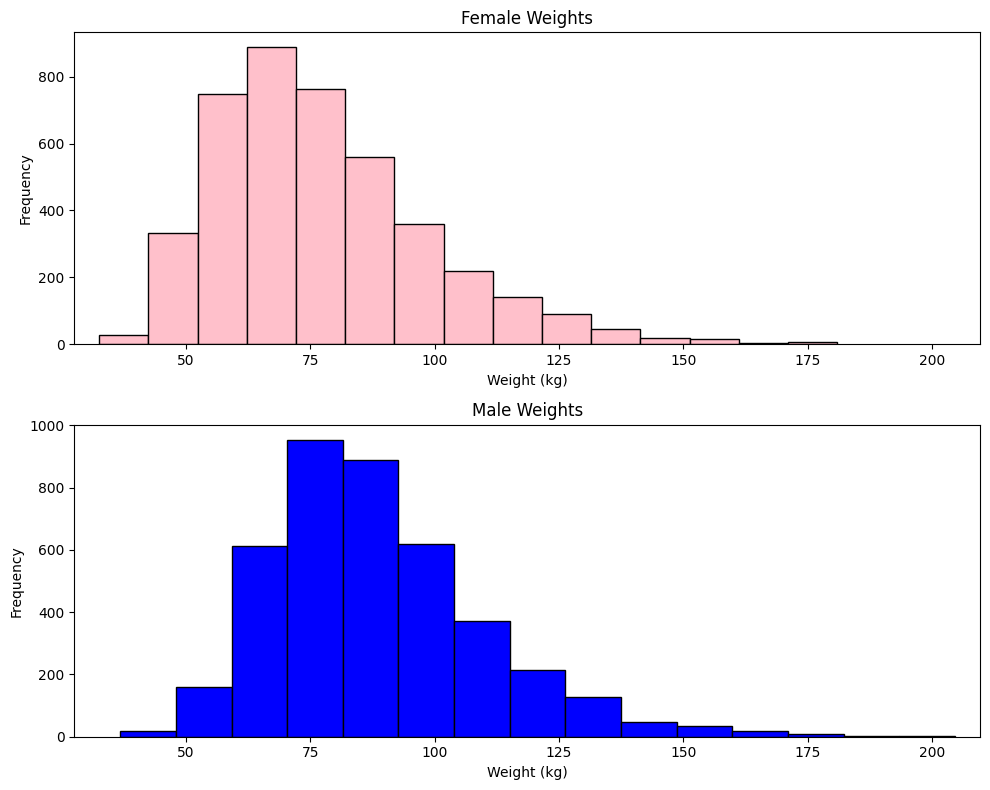

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


male_weights = male[1:,:1].reshape(-1)
female_weights = female[1:,:1].reshape(-1)

# Plotting histograms using subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))  # Two subplots, one above the other

# Female weights (top subfigure)
ax1.hist(female_weights, bins=15, color='pink', edgecolor='black')
ax1.set_title('Female Weights')
ax1.set_xlabel('Weight (kg)')
ax1.set_ylabel('Frequency')

# Male weights (bottom subfigure)
ax2.hist(male_weights, bins=15, color='blue', edgecolor='black')
ax2.set_title('Male Weights')
ax2.set_xlabel('Weight (kg)')
ax2.set_ylabel('Frequency')

# Determine common x-axis limits based on data ranges
min_weight = min(min(female_weights), min(male_weights))
max_weight = max(max(female_weights), max(male_weights))
ax1.set_xlim(min_weight - 5, max_weight + 5)  # Apply limits with some padding
ax2.set_xlim(min_weight - 5, max_weight + 5)

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


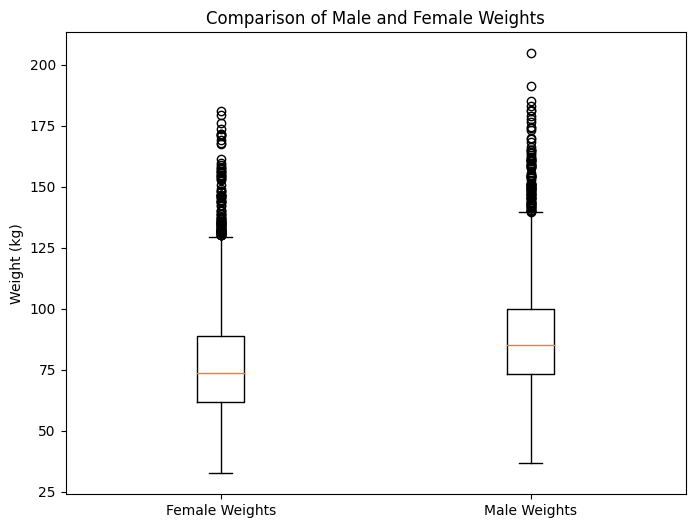

In [9]:
# Plotting a box-and-whisker plot for male and female weights
fig, ax = plt.subplots(figsize=(8, 6))

# Create a boxplot with male and female weights side by side
ax.boxplot([female_weights, male_weights], labels=['Female Weights', 'Male Weights'])

# Set title and labels
ax.set_title('Comparison of Male and Female Weights')
ax.set_ylabel('Weight (kg)')

# Show the plot
plt.show()


In [10]:
# Computing basic numerical aggregates for male and female weights
male_mean = np.mean(male_weights)
female_mean = np.mean(female_weights)

male_median = np.median(male_weights)
female_median = np.median(female_weights)

male_std = np.std(male_weights)
female_std = np.std(female_weights)

male_min = np.min(male_weights)
female_min = np.min(female_weights)

male_max = np.max(male_weights)
female_max = np.max(female_weights)

male_skewness = pd.Series(male_weights).skew()
female_skewness = pd.Series(female_weights).skew()

# Aggregating the values
aggregates = {
    'Measure': ['Mean', 'Median', 'Standard Deviation', 'Minimum', 'Maximum', 'Skewness'],
    'Male Weights': [male_mean, male_median, male_std, male_min, male_max, male_skewness],
    'Female Weights': [female_mean, female_median, female_std, female_min, female_max, female_skewness]
}

# Displaying the results in a DataFrame
aggregates_df = pd.DataFrame(aggregates)

aggregates_df


,Measure,Male Weights,Female Weights
0,Mean,88.364543,77.403791
1,Median,85.000000,73.600000
2,Standard Deviation,21.418937,21.542508
3,Minimum,36.800000,32.600000
4,Maximum,204.600000,180.900000
5,Skewness,0.984643,1.033728


In [11]:
new_cols = columns.copy()
if "BMI" not in  columns:
  new_cols.append("BMI")
new_cols

['Weight (kg)',
 'Standing Height (cm)',
 'Upper Arm Length (cm)',
 'Upper Leg Length (cm)',
 'Arm Circumference (cm)',
 'Hip Circumference (cm)',
 'Waist Circumference (cm)',
 'BMI']

In [12]:
import numpy as np

# Assuming the first column is 'Weight (kg)' and the second column is 'Standing Height (cm)'
weights = female[1:, 0].flatten()  # First column for weights
heights = female[1:, 1].flatten()  # Second column for heights

# Convert height from cm to meters for BMI calculation
heights_in_meters = heights / 100

# Calculate BMI
bmi = weights / (heights_in_meters ** 2)

# Add BMI as a new column to the female matrix
female_with_bmi = np.column_stack((female[1:], bmi))

female_pd = pd.DataFrame(female_with_bmi,columns = new_cols )

female_pd

,Weight (kg),Standing Height (cm),Upper Arm Length (cm),Upper Leg Length (cm),Arm Circumference (cm),Hip Circumference (cm),Waist Circumference (cm),BMI
0,97.1,160.2,34.7,40.8,35.8,126.1,117.9,37.835041
1,91.1,152.7,33.5,33.0,38.5,125.5,103.1,39.069720
2,73.0,161.2,37.4,38.0,31.8,106.2,92.0,28.092655
3,61.7,157.4,38.0,34.7,29.0,101.0,90.5,24.904378
4,55.4,154.6,34.6,34.0,28.3,92.5,73.2,23.178791
...,...,...,...,...,...,...,...,...
4216,66.8,157.0,32.6,38.4,30.7,103.8,92.5,27.100491
4217,116.9,167.4,42.2,43.0,40.7,128.4,120.0,41.716091
4218,73.0,159.6,36.2,37.0,31.4,104.6,99.3,28.658740
4219,78.6,168.5,38.1,40.2,36.0,102.4,98.5,27.683611


In [13]:
import numpy as np

# Assume 'female' is the dataset with shape (n_samples, n_columns)
# Skip the first row if it's a header, as you seem to be doing in the previous steps
data = female_with_bmi[1:, :]  # Exclude the header if present

# Calculate the mean and standard deviation for each column
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)

print(f"mean of each columns :\n {means}")
print(f"SD of each columns :\n {stds}")
# # Standardize each column (compute z-scores)
zfemale = (data - means) / stds

zfemale_pd = pd.DataFrame(zfemale,columns = new_cols)

zfemale_pd

mean of each columns :
 [ 77.39912322 160.13677725  36.03135071  37.157109    32.70959716
 109.17436019  98.48350711  30.10154666]
SD of each columns :
 [21.54292654  7.06285847  2.34606064  3.2144253   5.6094238  15.62212192
 17.39702126  7.75518332]


,Weight (kg),Standing Height (cm),Upper Arm Length (cm),Upper Leg Length (cm),Arm Circumference (cm),Hip Circumference (cm),Waist Circumference (cm),BMI
0,0.635980,-1.052942,-1.078979,-1.293267,1.032263,1.045033,0.265361,1.156410
1,-0.204203,0.150537,0.583382,0.262221,-0.162155,-0.190394,-0.372679,-0.259039
2,-0.728737,-0.387489,0.839130,-0.764401,-0.661315,-0.523255,-0.458901,-0.670154
3,-1.021176,-0.783929,-0.610108,-0.982169,-0.786105,-1.067356,-1.453324,-0.892662
4,-0.714811,-2.185627,-1.505226,-0.919950,-0.518698,-0.158388,-0.786543,-0.063240
...,...,...,...,...,...,...,...,...
4215,-0.492000,-0.444123,-1.462601,0.386660,-0.358254,-0.344022,-0.343939,-0.386974
4216,1.833589,1.028369,2.629365,1.817709,1.424461,1.230668,1.236792,1.497649
4217,-0.204203,-0.076000,0.071886,-0.048876,-0.233464,-0.292813,0.046933,-0.186044
4218,0.055743,1.184113,0.881754,0.946636,0.586585,-0.433639,0.000948,-0.311783


In [14]:
print("Before z-score normalization:")
stat = female_pd.describe().T
print(stat[['mean','std']].to_string())

print("\nAfter z-score normalization:")
z_stat = zfemale_pd.describe().T
print(z_stat[['mean','std']].to_string())

Before z-score normalization:
                                mean        std
Weight (kg)                77.403791  21.545061
Standing Height (cm)      160.136792   7.062859
Upper Arm Length (cm)      36.031035   2.346150
Upper Leg Length (cm)      37.157972   3.214914
Arm Circumference (cm)     32.710329   5.609625
Hip Circumference (cm)    109.178370  15.624294
Waist Circumference (cm)   98.488107  17.399588
BMI                        30.103379   7.756097

After z-score normalization:
                                  mean       std
Weight (kg)               6.718165e-15  1.000119
Standing Height (cm)      1.143435e-14  1.000119
Upper Arm Length (cm)    -7.351592e-14  1.000119
Upper Leg Length (cm)    -1.203629e-14  1.000119
Arm Circumference (cm)    2.626651e-15  1.000119
Hip Circumference (cm)   -5.657402e-15  1.000119
Waist Circumference (cm)  6.866335e-15  1.000119
BMI                      -1.192095e-15  1.000119


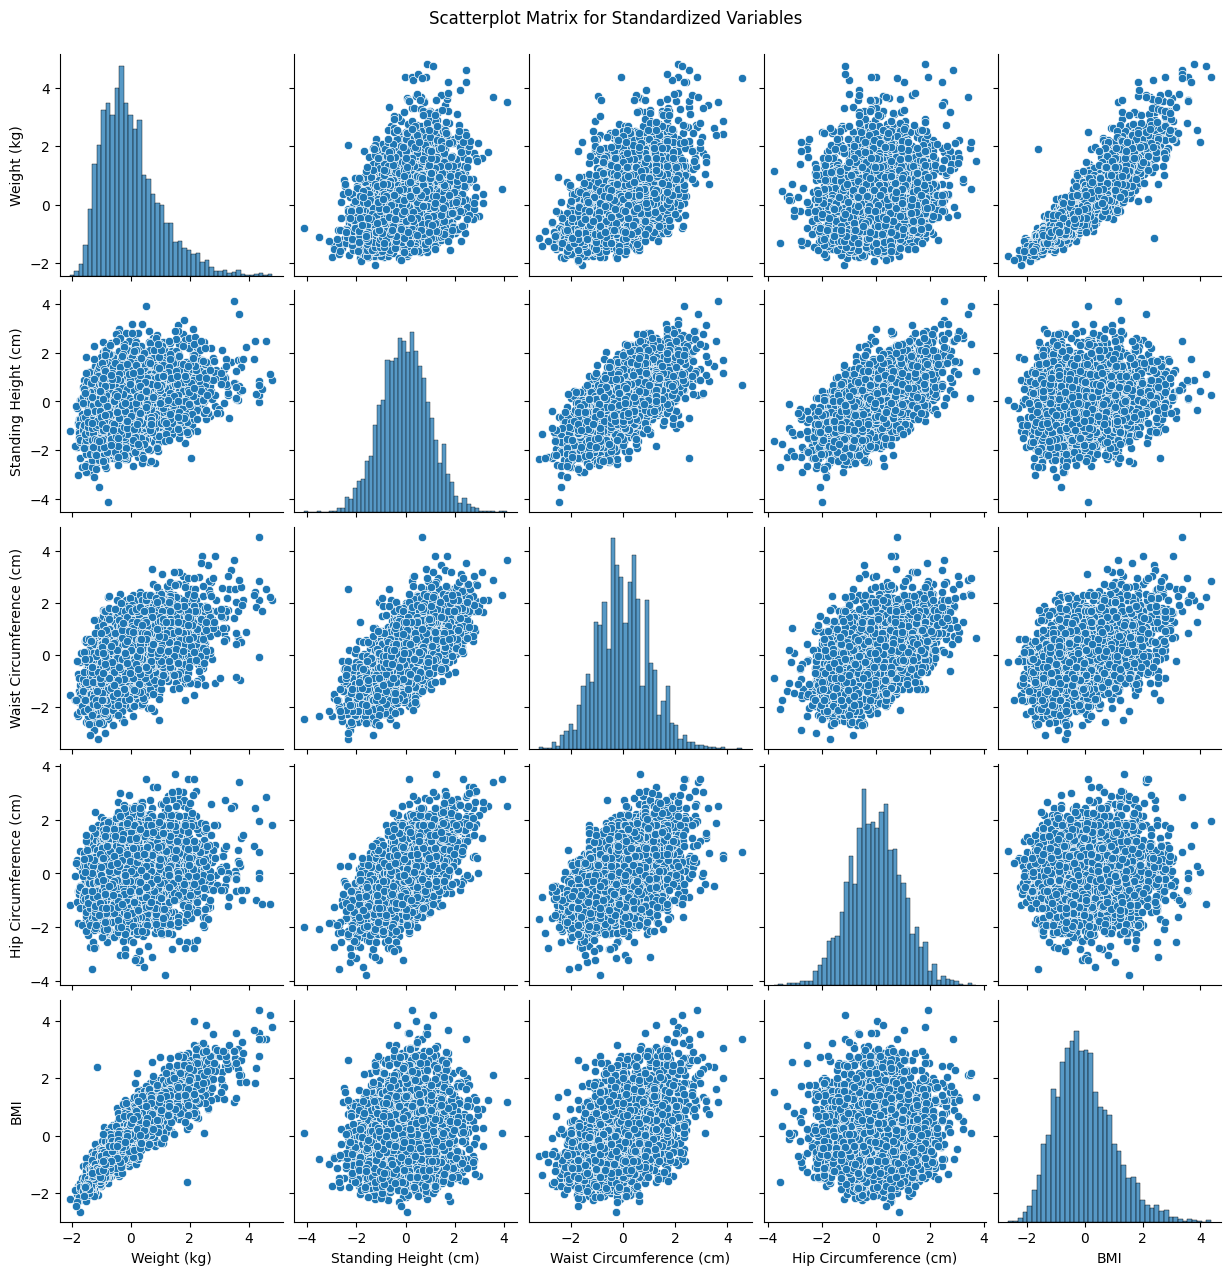

Pearson Correlation Coefficients:
                           Weight (kg)  Standing Height (cm)  Waist Circumference (cm)  Hip Circumference (cm)       BMI
Weight (kg)                  1.000000              0.345529                  0.551762                0.192989  0.905388
Standing Height (cm)         0.345529              1.000000                  0.667937                0.657300  0.151959
Waist Circumference (cm)     0.551762              0.667937                  1.000000                0.475888  0.453230
Hip Circumference (cm)       0.192989              0.657300                  0.475888                1.000000  0.079743
BMI                          0.905388              0.151959                  0.453230                0.079743  1.000000

Spearman Correlation Coefficients:
                           Weight (kg)  Standing Height (cm)  Waist Circumference (cm)  Hip Circumference (cm)       BMI
Weight (kg)                  1.000000              0.338901                  0.541818   

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Assume zfemale contains standardized columns for height, weight, waist circumference, hip circumference, and BMI
# Adjust the column names if needed to match your dataset
selected_columns = ['Weight (kg)', 'Standing Height (cm)', 'Waist Circumference (cm)', 'Hip Circumference (cm)', 'BMI']
zfemale_df = pd.DataFrame(zfemale[:, :5], columns=selected_columns)  # Adjust columns according to available data

# 1. Scatterplot matrix (Pairplot)
sns.pairplot(zfemale_df)
plt.suptitle("Scatterplot Matrix for Standardized Variables", y=1.02)
plt.show()


# 2. Compute Pearson and Spearman correlation coefficients
pearson_corr = zfemale_df.corr(method='pearson')
spearman_corr = zfemale_df.corr(method='spearman')

# Display the correlation matrices
print("Pearson Correlation Coefficients:\n", pearson_corr.to_string())
print("\nSpearman Correlation Coefficients:\n", spearman_corr.to_string())

Interpretation

1.scatterplot : BMI and Weight(kg) has positive trend since they are correlated with each other.

2.Pearson Correlation Coefficients: BMI and Weight(kg) have high correlation with a score of 0.905388

3.Spearman Correlation Coefficients: BMI and Weight(kg) have high correlation with a score of  0.913903

In [16]:
import numpy as np

# Assuming the data is stored in 'male' and 'female' matrices
# Columns assumed (adjust as needed):
# 0: Weight (kg), 1: Height (cm), 2: Waist Circumference (cm), 3: Hip Circumference (cm)

# 1. Compute for females
female_data = female[1:, :]  # Exclude header if present

# Extract height, waist circumference, and hip circumference
female_height = female_data[:, 1]  # Standing Height (cm)
female_waist = female_data[:, 2]   # Waist Circumference (cm)
female_hip = female_data[:, 3]     # Hip Circumference (cm)

# Calculate waist-to-height ratio and waist-to-hip ratio
female_waist_height_ratio = female_waist / female_height
female_waist_hip_ratio = female_waist / female_hip

# Add these ratios as new columns to the female matrix
female_with_ratios = np.column_stack((female_data, female_waist_height_ratio, female_waist_hip_ratio))

# 2. Compute for males
male_data = male[1:, :]  # Exclude header if present

# Extract height, waist circumference, and hip circumference
male_height = male_data[:, 1]  # Standing Height (cm)
male_waist = male_data[:, 2]   # Waist Circumference (cm)
male_hip = male_data[:, 3]     # Hip Circumference (cm)

# Calculate waist-to-height ratio and waist-to-hip ratio
male_waist_height_ratio = male_waist / male_height
male_waist_hip_ratio = male_waist / male_hip

# Add these ratios as new columns to the male matrix
male_with_ratios = np.column_stack((male_data, male_waist_height_ratio, male_waist_hip_ratio))

import pandas as pd

# New column names for the ratios
new_columns = ['Waist-to-Height Ratio', 'Waist-to-Hip Ratio']

# Convert the female data with ratios to a DataFrame
female_df = pd.DataFrame(female_with_ratios, columns= columns + new_columns)

# Convert the male data with ratios to a DataFrame
male_df = pd.DataFrame(male_with_ratios, columns= columns + new_columns)

# Print the first few rows to verify
print("Female DataFrame with Ratios:\n", female_df[["Waist-to-Height Ratio"  ,"Waist-to-Hip Ratio"]].head().to_string())
print("Male DataFrame with Ratios:\n", male_df[["Waist-to-Height Ratio"  ,"Waist-to-Hip Ratio"]].head().to_string())



Female DataFrame with Ratios:
    Waist-to-Height Ratio  Waist-to-Hip Ratio
0               0.216604            0.850490
1               0.219384            1.015152
2               0.232010            0.984211
3               0.241423            1.095101
4               0.223803            1.017647
Male DataFrame with Ratios:
    Waist-to-Height Ratio  Waist-to-Hip Ratio
0               0.230389            1.047382
1               0.223127            1.002439
2               0.253643            1.068182
3               0.235399            1.028646
4               0.222467            1.012531


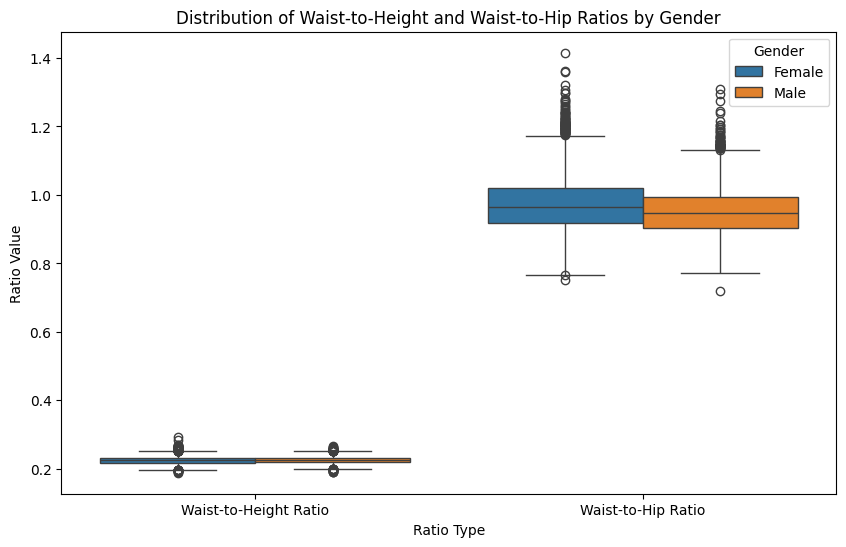

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

# Suppress FutureWarnings from pandas and seaborn
warnings.filterwarnings("ignore", category=FutureWarning)

# Combine the male and female data into a single DataFrame for easier plotting
female_df['Gender'] = 'Female'
male_df['Gender'] = 'Male'

# Concatenate the male and female DataFrames
combined_df = pd.concat([female_df, male_df], ignore_index=True)

# Melt the DataFrame to have a long format for easier plotting
melted_df = pd.melt(combined_df, id_vars='Gender', value_vars=['Waist-to-Height Ratio', 'Waist-to-Hip Ratio'],
                    var_name='Ratio Type', value_name='Ratio Value')

# Create the box-and-whisker plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ratio Type', y='Ratio Value', hue='Gender', data=melted_df)

# Customize the plot
plt.title('Distribution of Waist-to-Height and Waist-to-Hip Ratios by Gender')
plt.ylabel('Ratio Value')
plt.xlabel('Ratio Type')
plt.legend(title='Gender')

# Show the plot
plt.show()


interpretation :

Waist-to-Height Ratio: Males and females have very similar distributions, suggesting little gender difference in waist size relative to height.
Waist-to-Hip Ratio: Shows more gender-based differences, with females typically having a higher ratio, which might align with biological differences in body fat distribution.


### **Summary of Advantages and Disadvantages**

#### **1. Body Mass Index (BMI)**

- **Advantages:**
  - Simple and easy to calculate.
  - Widely used and accepted.
  - Useful for large-scale population studies.

- **Disadvantages:**
  - Does not distinguish between muscle and fat.
  - Ignores fat distribution (e.g., abdominal vs. peripheral fat).
  - Less accurate for certain groups (athletes, elderly, etc.).

---

#### **2. Waist-to-Height Ratio (WHtR)**

- **Advantages:**
  - Better indicator of central (abdominal) fat, closely linked to health risks.
  - Simple to calculate and more predictive of health outcomes than BMI.
  - More consistent across different ages, genders, and ethnicities.

- **Disadvantages:**
  - Waist measurements can vary depending on technique and conditions.
  - Not as widely used or standardized as BMI.

---

#### **3. Waist-to-Hip Ratio (WHR)**

- **Advantages:**
  - Reflects fat distribution, especially abdominal fat, which is a major risk factor for health problems.
  - More predictive of cardiovascular risks and metabolic diseases than BMI.
  - Works well for different body shapes and sizes.

- **Disadvantages:**
  - Waist and hip measurements can be inconsistent or difficult to standardize.
  - Does not indicate overall body fat percentage or muscle mass.
  - Less intuitive to understand and interpret.

---


In [18]:
# Get the BMI column (assuming it's the last column in the zfemale array)
bmi_column = zfemale_pd['BMI']

# Get the indices of the 5 persons with the lowest and highest BMI
lowest_bmi_indices = np.argsort(bmi_column)[:5]   # First 5 (lowest BMI)
highest_bmi_indices = np.argsort(bmi_column)[-5:] # Last 5 (highest BMI)

# Select the corresponding rows from the zfemale DataFrame
lowest_bmi_persons = zfemale_df.iloc[lowest_bmi_indices]
highest_bmi_persons = zfemale_df.iloc[highest_bmi_indices]

# Combine the two groups for printing
combined_df = pd.concat([lowest_bmi_persons, highest_bmi_persons])

# Print the results
print("Standardized Body Measurements for 5 Persons with Lowest and Highest BMI:\n")
print(combined_df.to_string())

Standardized Body Measurements for 5 Persons with Lowest and Highest BMI:

      Weight (kg)  Standing Height (cm)  Waist Circumference (cm)  Hip Circumference (cm)       BMI
261     -2.079528             -1.222844                 -1.547850               -1.168828 -2.194449
3477    -1.879927             -0.189269                 -1.718349                0.386660 -2.444029
2125    -1.536426              1.807090                  0.626007                0.573319 -2.265758
2752    -1.842792             -0.260061                 -0.226486                0.511099 -2.301412
1208    -1.610697              0.886783                 -0.098612                0.479990 -2.212277
2267     4.247374              0.292123                  1.862121               -0.982169  2.369299
3021     4.456260              0.504502                  1.691623               -1.137718  3.349792
1471     4.349496              0.277964                  2.842488                1.942148  4.365939
1103     4.804402        